#**Pushshift Reddit API**

In [ ]:
import pandas as pd
import requests #Pushshift accesses Reddit via an url so this is needed
import json #JSON manipulation
import csv #To Convert final table into a csv file to save to your machine
import time
import datetime

#We can access the Pushshift API through building an URL with the relevant parameters without even needing Reddit credentials.
#These are some examples. You can follow the links and they will generate a page with JSON data
search_lgbt_after_date = "https://api.pushshift.io/reddit/search/submission/?q=pandemic&after=1583845041&before=1630414641&subreddit=lgbt"
search_pandemic = "https://api.pushshift.io/reddit/search/submission/?q=pandemic"


In [ ]:
#Adapted from this https://gist.github.com/dylankilkenny/3dbf6123527260165f8c5c3bc3ee331b
#This function builds an Pushshift URL, accesses the webpage and stores JSON data in a nested list
def getPushshiftData(query, after, before, sub):
    #Build URL
    url = 'https://api.pushshift.io/reddit/search/submission/?title='+str(query)+'&size=1000&after='+str(after)+'&before='+str(before)+'&subreddit='+str(sub)
    #Print URL to show user
    print(url)
    #Request URL
    r = requests.get(url)
    #Load JSON data from webpage into data variable
    data = json.loads(r.text)
    #return the data element which contains all the submissions data
    return data['data']

In [ ]:
#This function will be used to extract the key data points from each JSON result
def collectSubData(subm):
    #subData was created at the start to hold all the data which is then added to our global subStats dictionary.
    subData = list() #list to store data points
    title = subm['title']
    url = subm['url']
    #flairs are not always present so we wrap in try/except
    try:
        flair = subm['link_flair_text']
    except KeyError:
        flair = "NaN"    
    author = subm['author']
    sub_id = subm['id']
    score = subm['score']
    created = datetime.datetime.fromtimestamp(subm['created_utc']) #1520561700.0
    numComms = subm['num_comments']
    permalink = subm['permalink']

    #Put all data points into a tuple and append to subData
    subData.append((sub_id,title,url,author,score,created,numComms,permalink,flair))
    #Create a dictionary entry of current submission data and store all data related to it
    subStats[sub_id] = subData

In [ ]:
#Create your timestamps and queries for your search URL
#https://www.unixtimestamp.com/index.php > Use this to create your timestamps
after = "1583845041" #Submissions after this timestamp (1577836800 = 03 Mar 20)
before = "1630414641" #Submissions before this timestamp (1607040000 = 31 Aug 21)
query = "pandemic" #Keyword(s) to look for in submissions
sub = "lgbt" #Which Subreddit to search in

#subCount tracks the no. of total submissions we collect
subCount = 0
#subStats is the dictionary where we will store our data.
subStats = {}

In [ ]:
# We need to run this function outside the loop first to get the updated after variable
data = getPushshiftData(query, after, before, sub)
# Will run until all posts have been gathered i.e. When the length of data variable = 0
# from the 'after' date up until before date
while len(data) > 0: #The length of data is the number submissions (data[0], data[1] etc), once it hits zero (after and before vars are the same) end
    for submission in data:
        collectSubData(submission)
        subCount+=1
    # Calls getPushshiftData() with the created date of the last submission
    print(len(data))
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    #update after variable to last created date of submission
    after = data[-1]['created_utc']
    #data has changed due to the new after variable provided by above code
    data = getPushshiftData(query, after, before, sub)
    
print(len(data))

https://api.pushshift.io/reddit/search/submission/?title=pandemic&size=1000&after=1583845041&before=1630414641&subreddit=lgbt
100
2020-12-08 11:12:18
https://api.pushshift.io/reddit/search/submission/?title=pandemic&size=1000&after=1607425938&before=1630414641&subreddit=lgbt
65
2021-08-07 15:16:58
https://api.pushshift.io/reddit/search/submission/?title=pandemic&size=1000&after=1628349418&before=1630414641&subreddit=lgbt
0


In [ ]:
print(str(len(subStats)) + " submissions have added to list")
print("1st entry is:")
print(list(subStats.values())[0][0][1] + " created: " + str(list(subStats.values())[0][0][5]))
print("Last entry is:")
print(list(subStats.values())[-1][0][1] + " created: " + str(list(subStats.values())[-1][0][5]))

165 submissions have added to list
1st entry is:
Grindr issues coronavirus warning to users as hook-ups thrive during pandemic created: 2020-03-12 21:08:06
Last entry is:
How Jennivee's Bakery and Its Owner Jenne Vailoces Thrived in Chicago's Boystown During the Pandemic Thanks to the LGBTQ Community created: 2021-08-07 15:16:58


In [ ]:
def updateSubs_file():
    upload_count = 0
    #location = "\\Reddit Data\\" >> If you're running this outside of a notebook you'll need this to direct to a specific location
    # print("input filename of submission file, please add .csv")
    # filename = input() #This asks the user what to name the file
    # file = filename
    with open("results.csv", 'w', newline='', encoding='utf-8') as csv_file: 
        a = csv.writer(csv_file, delimiter=',')
        headers = ["Post ID","Title","Url","Author","Score","Publish Date","Total No. of Comments","Permalink","Flair"]
        a.writerow(headers)
        for sub in subStats:
            a.writerow(subStats[sub][0])
            upload_count+=1
            
        print(str(upload_count) + " submissions have been uploaded")
updateSubs_file()

title_data = pd.read_csv("results.csv")
title_data.head()

165 submissions have been uploaded


,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,fhnnc7,Grindr issues coronavirus warning to users as ...,https://www.pinknews.co.uk/2020/03/12/grindr-s...,canadense,1,2020-03-12 21:08:06,2,/r/lgbt/comments/fhnnc7/grindr_issues_coronavi...,NaN
1,fj4amf,Just a couple pansexuals cooking pancakes duri...,https://i.redd.it/q1d09ll69vm41.jpg,Lucenia12,1,2020-03-15 16:50:53,24,/r/lgbt/comments/fj4amf/just_a_couple_pansexua...,NaN
2,fjep8i,Just a Portland gay *trying* to live the best ...,https://i.redd.it/7isb2cr6kym41.jpg,Pauleseus,1,2020-03-16 03:57:53,1,/r/lgbt/comments/fjep8i/just_a_portland_gay_tr...,NaN
3,fjrz5s,A brief gay comic for everyone to enjoy during...,https://i.redd.it/iw0qvv10j3n41.jpg,sora_souzou,1,2020-03-16 20:40:09,168,/r/lgbt/comments/fjrz5s/a_brief_gay_comic_for_...,Art/Creative
4,fk52im,Sorry my way of dealing with stress during the...,https://i.redd.it/xhjgq7uqg8n41.jpg,jerseygirl217,1,2020-03-17 13:16:28,1,/r/lgbt/comments/fk52im/sorry_my_way_of_dealin...,NaN


In [ ]:
title_data = title_data.drop(columns=["Post ID","Url","Author","Score","Publish Date","Permalink","Flair"])
title_data.head()

,Title,Total No. of Comments
0,Grindr issues coronavirus warning to users as ...,2
1,Just a couple pansexuals cooking pancakes duri...,24
2,Just a Portland gay *trying* to live the best ...,1
3,A brief gay comic for everyone to enjoy during...,168
4,Sorry my way of dealing with stress during the...,1


In [ ]:
# Load the regular expression library
import re
# Remove punctuation
title_data['title_text_processed'] = \
title_data['Title'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
title_data['title_text_processed'] = \
title_data['title_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
title_data['title_text_processed'].head()

0    grindr issues coronavirus warning to users as ...
1    just a couple pansexuals cooking pancakes duri...
2    just a portland gay *trying* to live the best ...
3    a brief gay comic for everyone to enjoy during...
4    sorry my way of dealing with stress during the...
Name: title_text_processed, dtype: object

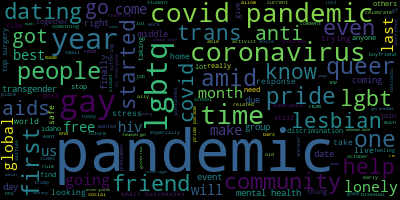

In [ ]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(title_data['title_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [ ]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = title_data.title_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['grindr', 'issues', 'coronavirus', 'warning', 'users', 'hook', 'ups', 'thrive', 'pandemic']


In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


In [ ]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.054*"pandemic" + 0.012*"lgbt" + 0.012*"lesbian" + 0.012*"sex" + '
  '0.008*"people" + 0.008*"year" + 0.006*"covid" + 0.006*"time" + '
  '0.006*"started" + 0.006*"free"'),
 (1,
  '0.088*"pandemic" + 0.014*"gay" + 0.012*"like" + 0.010*"coming" + '
  '0.008*"going" + 0.008*"know" + 0.008*"go" + 0.008*"queer" + 0.007*"time" + '
  '0.007*"one"'),
 (2,
  '0.052*"pandemic" + 0.013*"pride" + 0.013*"lonely" + 0.013*"lgbtq" + '
  '0.013*"covid" + 0.009*"reset" + 0.009*"since" + 0.009*"hiv" + '
  '0.009*"feeling" + 0.009*"isolated"'),
 (3,
  '0.052*"pandemic" + 0.012*"covid" + 0.012*"governor" + 0.012*"idaho" + '
  '0.012*"transgender" + 0.012*"health" + 0.012*"mental" + 0.012*"money" + '
  '0.012*"last" + 0.006*"amid"'),
 (4,
  '0.047*"pandemic" + 0.017*"got" + 0.012*"gay" + 0.009*"year" + 0.008*"share" '
  '+ 0.008*"surgery" + 0.008*"donate" + 0.008*"please" + 0.008*"date" + '
  '0.008*"us"'),
 (5,
  '0.058*"pandemic" + 0.013*"gay" + 0.009*"old" + 0.009*"man" + 0.009*"pride" '
  '+ 0.

In [ ]:
!pip install pyLDAvis

import pickle 
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'results_10'
print(LDAvis_data_filepath)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=8fbd1b9351f178bf50d874446b0919e285c5c70e5dc07f9ad5fabee0b72d3d0b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


results_10


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.006943 -0.164416       1        1  22.269059
4     -0.111087  0.058718       2        1  12.970486
6     -0.099743  0.053744       3        1  11.179207
9     -0.007989 -0.059188       4        1   9.343494
8      0.128326  0.056796       5        1   9.247895
5     -0.048177  0.002625       6        1   8.854264
2      0.017288  0.002886       7        1   8.220295
7      0.039837  0.036296       8        1   7.410497
3      0.071985  0.025311       9        1   5.823069
0      0.016503 -0.012771      10        1   4.681733, topic_info=         Term        Freq       Total Category  logprob  loglift
260     small    5.000000    5.000000  Default   30.000  30.0000
99        got    8.000000    8.000000  Default   29.000  29.0000
208     pride    8.000000    8.000000  Default   28.000  28.0000
4    pandemic  111.000000  111.000000  Default   27.000  27.0000
67      covid   12.000000   12.000000  Default   26.000  26.0000
..        ...         ...         ...      ...      ...      ...
41   everyone    0.526093    4.506276  Topic10   -5.068   0.9138
680      give    0.526092    3.166300  Topic10   -5.068   1.2667
331    middle    0.526091    3.688711  Topic10   -5.068   1.1139
259    rights    0.526090    3.117227  Topic10   -5.068   1.2823
137    lonely    0.526090    4.471725  Topic10   -5.068   0.9214

[571 rows x 6 columns], token_table=      Topic      Freq     Term
term                          
226      10  0.893193   abbott
362       2  0.732167     able
362       3  0.366083     able
163       6  0.761709   access
747       8  0.793550      ace
...     ...       ...      ...
110       5  0.175096    years
110       7  0.175096    years
110       8  0.175096    years
110       9  0.175096    years
706      10  0.893193  youtube

[744 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 5, 7, 10, 9, 6, 3, 8, 4, 1])

#**Reddit API**

In [1]:
#import modules
!pip install praw
import praw
import pandas as pd
import csv
import numpy as np

     |████████████████████████████████| 188 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.5 MB/s 


In [2]:
[REDACTED]
reddit = praw.Reddit(client_id=" ",#my client id
                     client_secret=" ",  #my client secret
                     user_agent=" ", #user agent name
                     username = " ",     # my reddit username
                     password = " ",
                     check_for_async=False)     # my reddit password

In [3]:
sub = ['TransgenderIndia']  # make a list of subreddits you want to scrape the data from

for s in sub:
    subreddit = reddit.subreddit(s)   # Chosing the subreddit

In [4]:
subreddit = reddit.subreddit("lgbt")

dfs = []
for post in subreddit.hot(limit=None):
    df = post.title
    dfs.append(df)

In [5]:
df = pd.DataFrame(dfs)
df.head()

,0
0,Emergency Post for LGBT+ People Living in Ukraine
1,Turns out John Mulaney’s father was actually r...
2,"Leaving work then vs now, needless to say my f..."
3,It’s glorious! Just came in the mail.
4,One month post-op top surgery! Just in time fo...


In [6]:
df.to_csv('result.csv')

In [7]:
import nltk
nltk.download('stopwords')
import _pickle as cPickle
from nltk.corpus import stopwords

!pip install -U gensim
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora
from pprint import pprint
import json

from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

import os
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
     |████████████████████████████████| 24.1 MB 1.5 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [8]:
df['processed_text'] = \
df[0].map(lambda x: re.sub('[,\.!?]', '', x))

df['processed_text'] = \
df['processed_text'].map(lambda x: x.lower())

df['processed_text'].head()

0    emergency post for lgbt+ people living in ukraine
1    turns out john mulaney’s father was actually r...
2    leaving work then vs now needless to say my fa...
3                  it’s glorious just came in the mail
4    one month post-op top surgery just in time for...
Name: processed_text, dtype: object

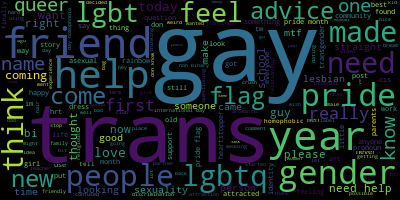

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['processed_text'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [11]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    with open("remove_words.txt", "r") as f:
      MORE_STOPWORDS = [word.strip() for word in f.read().splitlines()]

    STOPWORDS = stopwords.words('english')
    ALL_STOPWORDS = set(list(STOPWORDS) + MORE_STOPWORDS) 
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words and word not in ALL_STOPWORDS] for doc in texts]
data = df.processed_text.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

['emergency', 'post', 'lgbt', 'people', 'living', 'ukraine']


In [12]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1)]


In [13]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.023*"help" + 0.022*"gay" + 0.017*"advice" + 0.013*"gender" + '
  '0.012*"trans" + 0.009*"pride" + 0.009*"lgbt" + 0.007*"support" + '
  '0.007*"pan" + 0.006*"right"'),
 (1,
  '0.012*"today" + 0.010*"think" + 0.008*"friends" + 0.008*"trans" + '
  '0.006*"lgbtq" + 0.006*"attraction" + 0.006*"romantic" + 0.006*"feel" + '
  '0.006*"label" + 0.006*"someone"'),
 (2,
  '0.016*"trans" + 0.015*"one" + 0.014*"love" + 0.011*"advice" + 0.009*"gay" + '
  '0.008*"dress" + 0.006*"song" + 0.006*"making" + 0.006*"mom" + '
  '0.006*"rights"'),
 (3,
  '0.025*"pride" + 0.017*"gay" + 0.011*"art" + 0.009*"happy" + 0.009*"school" '
  '+ 0.008*"name" + 0.008*"homophobia" + 0.008*"lgbt" + 0.008*"lesbian" + '
  '0.008*"time"'),
 (4,
  '0.014*"trans" + 0.011*"think" + 0.011*"pride" + 0.011*"bi" + 0.009*"person" '
  '+ 0.009*"feel" + 0.007*"cis" + 0.007*"wish" + 0.007*"good" + '
  '0.005*"people"'),
 (5,
  '0.017*"help" + 0.014*"pride" + 0.012*"something" + 0.011*"flag" + '
  '0.009*"heartstopper" + 0.00

In [14]:
!pip install pyLDAvis

# import pyLDAvis.gensim
# import pyLDAvis.gensim
import pickle 
import pyLDAvis

import pyLDAvis.gensim_models as gensimvis


# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = 'results_10'
print(LDAvis_data_filepath)
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, LDAvis_data_filepath +'.html')
LDAvis_prepared

     |████████████████████████████████| 1.7 MB 5.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=703bdd1327a79437200a24b868f441ecd437e20d5bc23e48fb9097a6c6f531a0
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


results_10


/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.027492 -0.113154       1        1  13.166934
7     -0.086620  0.062403       2        1  12.350747
0     -0.067923 -0.033486       3        1  11.460546
2     -0.031728  0.020411       4        1  10.191993
9      0.067775  0.129863       5        1   9.969278
8      0.048812 -0.017804       6        1   9.704602
4     -0.068171 -0.017767       7        1   9.231460
5      0.004343  0.030118       8        1   9.073732
1      0.139122 -0.062104       9        1   8.014314
6      0.021881  0.001520      10        1   6.836393, topic_info=          Term       Freq      Total Category  logprob  loglift
211     advice  18.000000  18.000000  Default  30.0000  30.0000
342       help  38.000000  38.000000  Default  29.0000  29.0000
388  sexuality  13.000000  13.000000  Default  28.0000  28.0000
47       trans  34.000000  34.000000  Default  27.0000  27.0000
119  something  11.000000  11.000000  Default  26.0000  26.0000
..         ...        ...        ...      ...      ...      ...
68         gay   1.314597  43.042443  Topic10  -5.4106  -0.8057
471    looking   1.314449  11.541671  Topic10  -5.4107   0.5104
111       feel   1.314418  18.688200  Topic10  -5.4108   0.0284
719      found   1.314395   8.930011  Topic10  -5.4108   0.7669
166     coming   1.314336  15.147416  Topic10  -5.4108   0.2384

[675 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
680       9  0.737074       aaaah
1186      3  0.716761     abusive
904       8  0.732631      accept
215       3  0.358839  acceptance
215       5  0.358839  acceptance
...     ...       ...         ...
483       9  0.287574   yesterday
1425      3  0.716766  yesterdays
66        2  0.242962         yet
66        4  0.485923         yet
1276      9  0.737089       zajmi

[1144 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 8, 1, 3, 10, 9, 5, 6, 2, 7])